In [1]:
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
%matplotlib inline

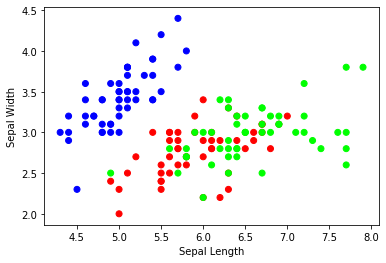

In [2]:
iris_obj = load_iris()
iris_data = iris_obj.data
species = iris_obj.target

plt.scatter(iris_data[:, 0], iris_data[:, 1], c=species, cmap=plt.cm.brg)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

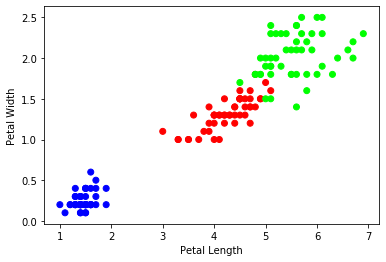

In [3]:
plt.scatter(iris_data[:, 2], iris_data[:, 3], c=species, cmap=plt.cm.brg)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [4]:
iris_mds = MDS(n_components=2, dissimilarity="euclidean")
iris_2d = iris_mds.fit_transform(iris_data)
iris_2d[:5, :]

array([[ 1.16659432, -2.45299857],
       [ 1.61699168, -2.20234124],
       [ 1.65111838, -2.39543745],
       [ 1.73321109, -2.16599714],
       [ 1.17111005, -2.50874994]])

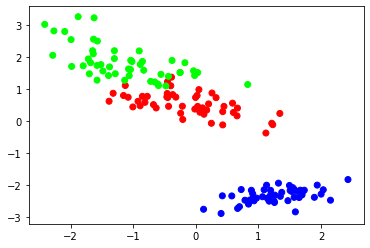

In [5]:
plt.scatter(iris_2d[:, 0], iris_2d[:, 1], c=species, cmap=plt.cm.brg)
plt.show()

In [6]:
import pandas as pd
from nltk import ngrams
import numpy as np

In [7]:
headlines = pd.read_csv("HNHeadlines.txt", header=None, index_col=0).iloc[:, 0]
headline_sets = [set(''.join(u) for u in ngrams(h.lower(), 3)) for h in headlines]
sims = np.zeros((len(headlines), len(headlines)))    # Will contain the affinity matrix
for i in range(len(headlines)):
    for j in range(i, len(headlines)):
        h1, h2 = headline_sets[i], headline_sets[j]
        js = len(h1.intersection(h2))/len(h1.union(h2))    # Compute the Jaccard similarity for the two documents
        sims[i,j] = sims[j,i] = js    # Store the Jaccard similarity in the appropriate entries of the matrix

In [8]:
headline_mds = MDS(n_components=2, dissimilarity="precomputed")
headlines_coords = headline_mds.fit_transform(1 - sims)
headlines_coords[:5, :]

array([[ 0.14753611,  0.61214443],
       [-0.40192918, -0.52869456],
       [ 0.51860712,  0.12318865],
       [-0.50796356, -0.50541394],
       [-0.18339853, -0.22311696]])

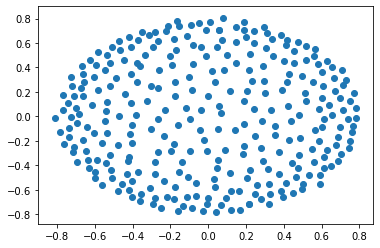

In [9]:
plt.scatter(x=headlines_coords[:, 0], y=headlines_coords[:, 1])
plt.show()